<a href="https://colab.research.google.com/github/danacioDS/AI-ML-SimpliLearn/blob/master/02_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Logistic Regression**

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn import metrics 

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
digits = load_digits()

In [5]:
print("Image Data Shape", digits.data.shape)
print("Image Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Image Data Shape (1797,)


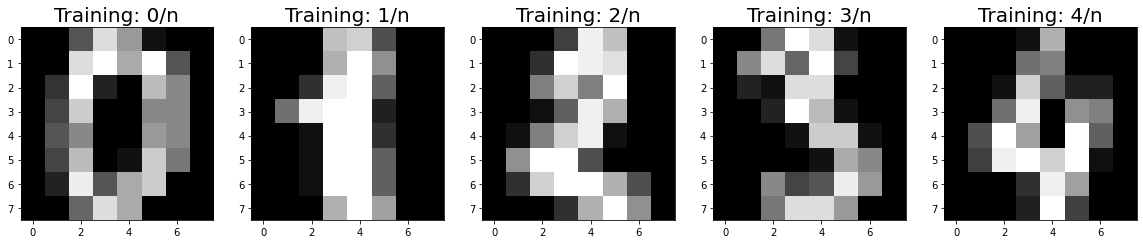

In [8]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], 
                                           digits.target[0:5])):
  plt.subplot(1, 5, index + 1)
  plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
  plt.title('Training: %i/n' % label, fontsize = 20)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.23, random_state=2)

In [17]:
print(X_train.shape)
print(y_train.shape)

(1383, 64)
(1383,)


In [18]:
print(X_test.shape)
print(y_test.shape)

(414, 64)
(414,)


In [19]:
from sklearn.linear_model import LogisticRegression

In [21]:
logReg = LogisticRegression()
logReg.fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
# Returns a Numpy Array
# Predict for One Observation (image)

print(logReg.predict(X_test[0].reshape(1,-1)))

[4]


In [23]:
logReg.predict(X_test[0:10])

array([4, 0, 9, 1, 8, 7, 1, 5, 1, 6])

In [24]:
predictions = logReg.predict(X_test)

In [25]:
score = logReg.score(X_test, y_test)
print(score)

0.9516908212560387


In [27]:
from sklearn.metrics import confusion_matrix

In [30]:
cm = confusion_matrix(y_test, predictions)
print(cm)

[[37  0  0  0  1  0  0  0  0  0]
 [ 0 45  0  1  0  0  0  0  1  1]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  0  0  1  1  0]
 [ 0  0  0  0 34  0  0  0  3  1]
 [ 0  1  0  0  1 44  0  0  0  0]
 [ 0  1  0  0  0  0 39  0  1  0]
 [ 0  0  0  0  0  0  0 45  1  0]
 [ 0  0  0  0  0  0  0  0 37  1]
 [ 0  0  0  2  0  1  0  0  1 30]]


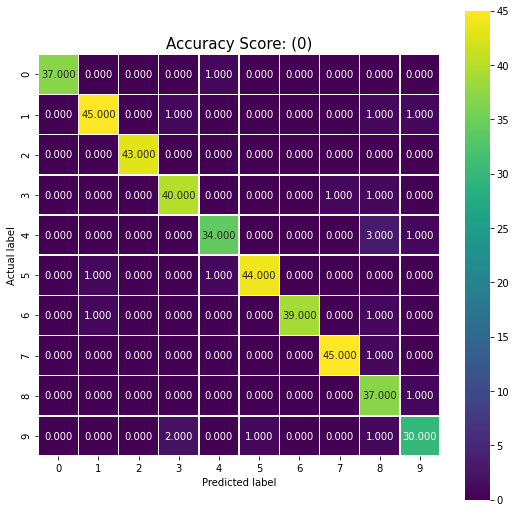

In [37]:
plt.figure(figsize=(9,9))
colormap = plt.cm.viridis
sns.heatmap(cm, annot=True, fmt='.3f', 
            linewidths=.5, square = True, cmap = colormap);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: (0)'.format(score)
plt.title(all_sample_title, size = 15);            

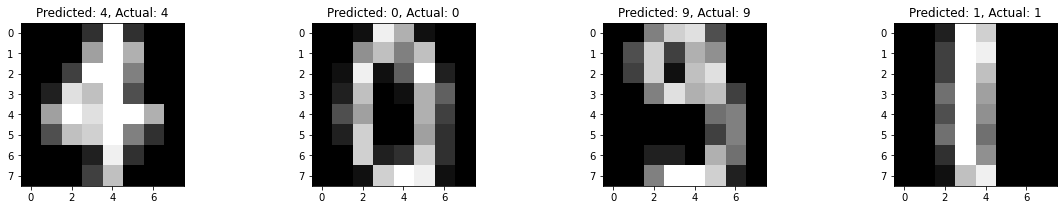

In [50]:
index = 0
missclassifiedIndex = []
colormap = plt.cm.autumn_r
for predict, actual in zip(predictions, y_test):
  if predict == actual:
    missclassifiedIndex.append(index)
  index += 1
plt.figure(figsize=(20,3))
for plotIndex, wrong in enumerate(classifiedIndex[0:4]):
  plt.subplot(1,4, plotIndex +1)
  plt.imshow(np.reshape(X_test[wrong], (8,8)), cmap=plt.cm.gray)
  plt.title('Predicted: {}, Actual: {}'.format(predictions[wrong], 
                                                y_test[wrong], fontsize=20))
      

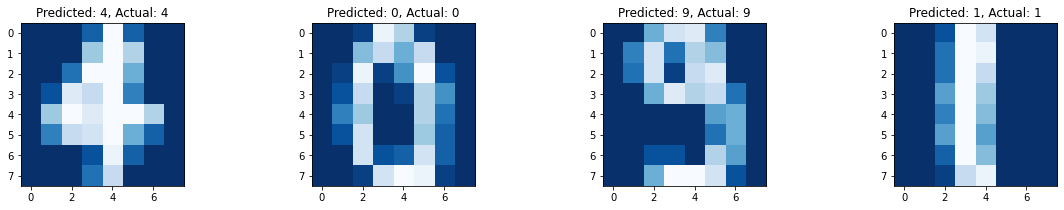

In [53]:
index = 0
classifiedIndex = []
colormap = plt.cm.Blues_r
for predict, actual in zip(predictions, y_test):
  if predict == actual:
    classifiedIndex.append(index)
  index += 1
plt.figure(figsize=(20,3))
for plotIndex, wrong in enumerate(classifiedIndex[0:4]):
  plt.subplot(1,4, plotIndex +1)
  plt.imshow(np.reshape(X_test[wrong], (8,8)), cmap=colormap)
  plt.title('Predicted: {}, Actual: {}'.format(predictions[wrong], 
                                                y_test[wrong], fontsize=20))